## Visualisierung der Verteilung der Wörter in der Wordle.at Wortliste

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
with open("words.json") as f:
    lines = json.load(f)

In [3]:
letter_distribution = []

for i in range(5):
    letters = {"A": 0, "B": 0, "C": 0, "D": 0, "E": 0, "F": 0, "G": 0, "H": 0, "I": 0, "J": 0, "K": 0, 
                        "L": 0, "M": 0, "N": 0, "O": 0, "P": 0, "Q": 0, "R": 0, "S": 0, "T": 0, "U": 0, "V": 0, 
                        "W": 0, "X": 0, "Y": 0, "Z": 0}

    for idx, line in enumerate(lines):
        line = line.replace("\n", "")
        
        valid_word = True
        
        for letter in line:
            if not letter in letters:
                valid_word = False
                break

        if len(line) > 0 and valid_word:
            letter = line[i].upper()
            
            try:
                letters[letter] += 1
            except:
                print("letter: " + letter + ", position: " + str(idx))
    
    letter_distribution.append(letters)

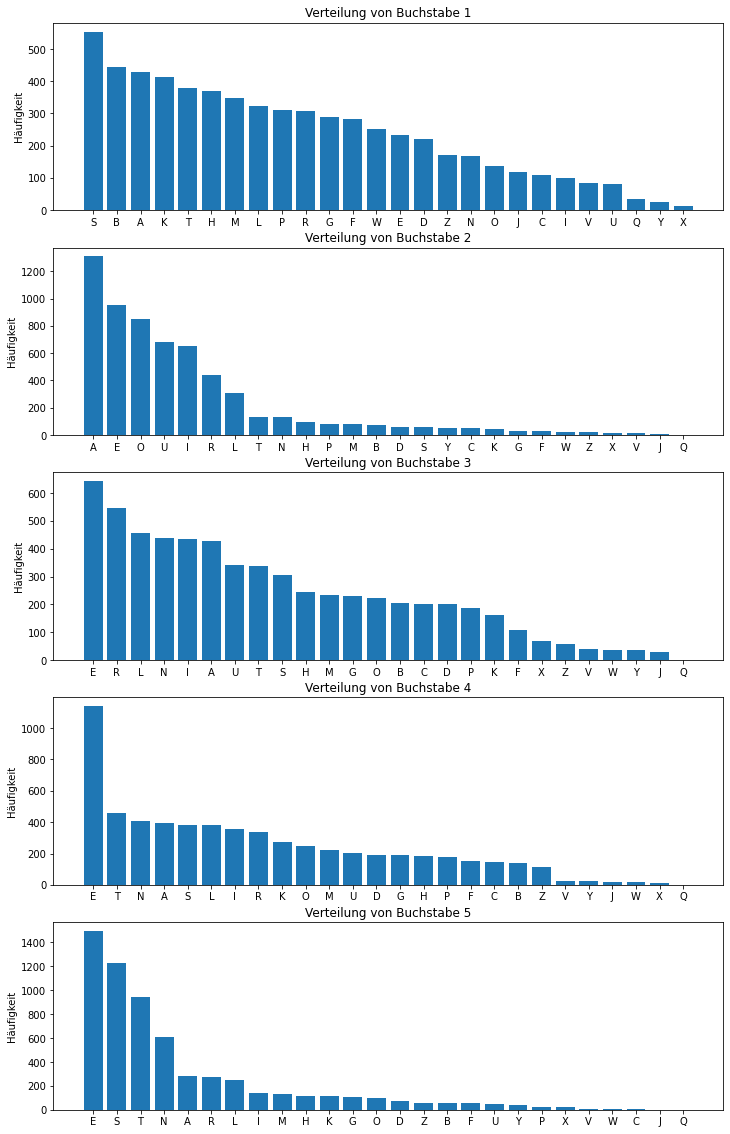

In [4]:
fig, axs = plt.subplots(len(letter_distribution))
fig.set_size_inches(12, 20)

for idx, distribution in enumerate(letter_distribution):

    distribution_sorted = {k: v for k, v in sorted(distribution.items(), key=lambda item: -item[1])}
    
    x = [i + 1 for i in range(26)]

    p = axs[idx].bar(x, distribution_sorted.values())
    axs[idx].set_xticks(x, labels=distribution_sorted.keys())
    axs[idx].set_ylabel("Häufigkeit")
    axs[idx].set_title("Verteilung von Buchstabe " + str(idx + 1))

plt.show("VerteilungBuchstaben.png")